# Import libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data

In [23]:
batch_size = 15
img_size = (250,250)
dataset_path = 'Testing'

train_dataset =  tf.keras.utils.image_dataset_from_directory(
    directory = dataset_path,
    batch_size = batch_size,
    image_size = img_size,
    shuffle = True,
    seed = 2930012,
    validation_split = 0.3, #70% of the images will be used for training
    subset = "training"
)

test_dataset =  tf.keras.utils.image_dataset_from_directory(
    directory = dataset_path,
    batch_size = batch_size,
    image_size = img_size,
    shuffle = True,
    seed = 2930012,
    validation_split = 0.3, #30% of the images will be used for validation
    subset = "validation"
)

class_names = train_dataset.class_names
print(class_names)


#print("Training Set")
#for image_batch, labels_batch in train_ds:
#    print(str(image_batch.shape) + str(labels_batch.shape))

#print("Validation Set")
#for image_batch, labels_batch in test_ds:
#    print(str(image_batch.shape) + str(labels_batch.shape))

Found 255 files belonging to 2 classes.
Using 179 files for training.
Found 255 files belonging to 2 classes.
Using 76 files for validation.
['NORMAL', 'PNEUMONIA']


# Understainding the data

'\n\nThe code below will plot all the batches used for testing purposes.\n\n'

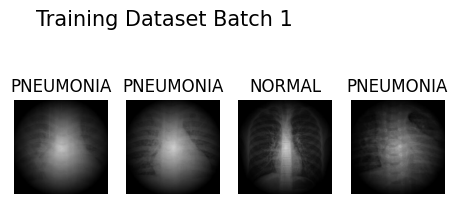

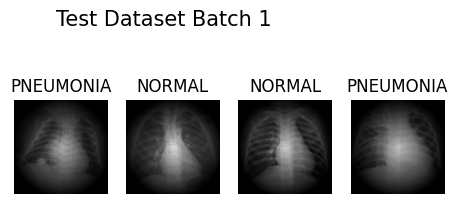

In [26]:
'''

The code below will plot the first batch.

'''

fig = plt.figure(figsize=(7, 5))
fig.suptitle('Training Dataset Batch 1', fontsize=15)
for x in range(5):
    for images, labels in train_dataset.take(x):
            ax = plt.subplot( 2, 5, x + 1)
            plt.imshow(images[x].numpy().astype("uint8"))
            plt.title(class_names[labels[x]])
            plt.axis("off")
            plt.show

fig = plt.figure(figsize=(7, 5))
fig.suptitle('Test Dataset Batch 1', fontsize=15)
for x in range(5):
    for images, labels in test_dataset.take(x):
            ax = plt.subplot( 2, 5, x + 1)
            plt.imshow(images[x].numpy().astype("uint8"))
            plt.title(class_names[labels[x]])
            plt.axis("off")
            plt.show


'''

The code below will plot all the batches used for testing purposes.

'''


# for i in range(13):
#     fig = plt.figure(figsize=(10, 5))
#     title = 'Training Dataset (Batch ' + str(i), "/12"
#     fig.suptitle(title, fontsize=15)
#     for images, labels in train_dataset.take(i):
#         for x in range(2):
#             ax = plt.subplot( 2, 5, x + 1)
#             plt.imshow(images[x].numpy().astype("uint8"))
#             plt.title(class_names[labels[x]])
#             plt.axis("off")
#             plt.show


# for i in range(13):
#     fig = plt.figure(figsize=(10, 5))
#     title = 'Test Dataset (Batch ' + str(i), "/12"
#     fig.suptitle(title, fontsize=15)
#     for images, labels in test_dataset.take(i):
#         for x in range(2):
#             ax = plt.subplot( 2, 5, x + 1)
#             plt.imshow(images[x].numpy().astype("uint8"))
#             plt.title(class_names[labels[x]])
#             plt.axis("off")
#             plt.show





# Create the model & Layers

In [27]:
Autotune = tf.data.AUTOTUNE
no_classes = 2



# model = tf.keras.Sequential([
#     #tf.keras.layers.Rescaling(1./255),

#     # [ First Layer ]
#     tf.keras.layers.Conv2D(32, 4, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),

#     # [ Second Layer ]
#     tf.keras.layers.Conv2D(32, 4, activation='relu'),


#     # [ Third Layer ]
#     tf.keras.layers.Conv2D(64, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),

#     # [ Fourth Layer ]
#     tf.keras.layers.Conv2D(64, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
    
#     # [ Fifth Layer ]
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(500, activation='relu'),
#     tf.keras.layers.Dropout(0.6000000000000001), #0.25
#     #tf.keras.layers.Dense(500, activation='relu'),
#     tf.keras.layers.Dense(no_classes)
# ])




model = tf.keras.Sequential([
    
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Dropout(0.6000000000000001), #0.25
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(no_classes)
])




# Compile the model

In [28]:
learning_rate =  0.0001

model.compile(
  optimizer = keras.optimizers.Adam(learning_rate),
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), #maybe change later
  metrics = ['accuracy'])

# Training & Analysis


Epoch 1/20


12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 883ms/step - accuracy: 0.9052 - loss: 0.2528 - val_accuracy: 0.7368 - val_loss: 0.5161
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 853ms/step - accuracy: 0.8817 - loss: 0.2807 - val_accuracy: 0.6579 - val_loss: 0.6865
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 852ms/step - accuracy: 0.7501 - loss: 0.5769 - val_accuracy: 0.7368 - val_loss: 0.5315
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 858ms/step - accuracy: 0.8457 - loss: 0.3432 - val_accuracy: 0.8026 - val_loss: 0.4809
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 855ms/step - accuracy: 0.8984 - loss: 0.2100 - val_accuracy: 0.7500 - val_loss: 0.4696
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 873ms/step - accuracy: 0.8882 - loss: 0.2611 - val_accuracy: 0.7368 - val_loss: 0.5151
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 857ms/step - accuracy: 0.9183 - loss: 0.2123 - val_accuracy: 0.7632 - val_loss: 0.4708
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 869ms/step - accuracy: 0.9463 - loss: 0.2084 - val_accuracy: 0.750

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 122, 122, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 122, 122, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 120, 120, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 58, 58, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │    53,824,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │         1,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,562,428 (616.31 MB)

 Trainable params: 53,854,142 (205.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,708,286 (410.87 MB)

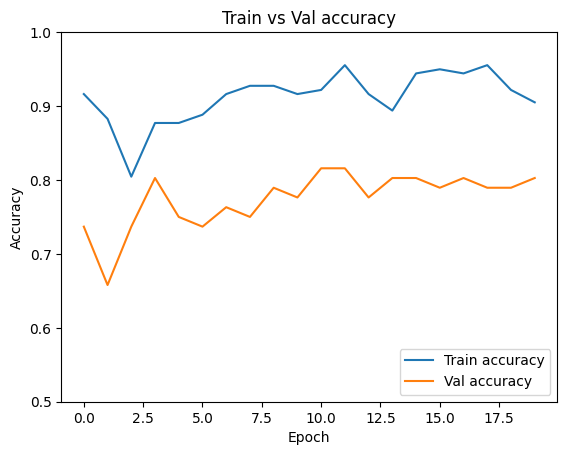

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
Predictions for validation set: [1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1
 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1
 1 1]


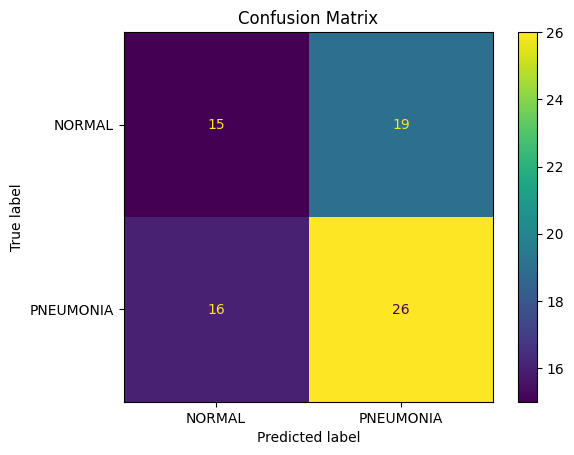

In [30]:
no_epochs = 20


history = model.fit(
  train_dataset,
  validation_data = test_dataset,
  epochs= no_epochs
)


'''

'''

model.summary()


'''

'''


plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')
plt.title('Train vs Val accuracy')
plt.show()


'''

Actual Labels with an numpy array.

'''

y_true = np.array([])
for image_batch, labels_batch in test_dataset:
    y_true = np.append(y_true, labels_batch.numpy())

'''

# Evaluate Model

'''

y_prediction = model.predict(test_dataset)
y_prediction = np.argmax(y_prediction, axis = 1)
print('Predictions for validation set: ' + str(y_prediction))

'''

Print confusion matrix

'''

cm = confusion_matrix(y_true, y_prediction)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)
display.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()



# Save

In [31]:
model.save('firstmodeltrain.keras')